# 3. SARIMA Model

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# ARIMA
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
# Lineare Reg
import statsmodels.api as sm

## Importing Data

In [2]:
cities = pd.read_csv("cities.csv")
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
cities = cities.drop(cities.columns[0], axis=1)
train = train.drop(train.columns[0], axis=1)
test = test.drop(test.columns[0], axis=1)
cities["Date"] = pd.to_datetime(cities["Date"])
train["Date"] = pd.to_datetime(train["Date"])
train = train.set_index("Date")
test["Date"] = pd.to_datetime(test["Date"])
test = test.set_index("Date")

In [4]:
cov_MSP = pd.read_csv("us-covid-data_minneapolis.csv")
cov_MIA = pd.read_csv("us-covid-data_miami.csv")
cov_LAS = pd.read_csv("us-covid-data_las-vegas.csv")

## 3.1 Results

### Minneapolis

In [5]:
smodel_MSP = pm.auto_arima(train.MSP, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=1, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel_MSP.summary()

# @ ALL:
# Ljung Box p value (Prob(Q) and JB p value (Prob(JB) are > 0.05 
# thus residuals are uncorrelated and normally distributed.

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=2614.781, Time=0.49 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2627.314, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2616.217, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=2616.816, Time=0.16 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=2628.025, Time=0.11 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=2613.420, Time=0.46 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=2613.872, Time=0.30 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=2615.419, Time=1.04 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=2615.419, Time=1.94 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=2615.118, Time=0.88 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=2614.412, Time=0.64 sec
 ARIMA(1,1,1)(2,1,2)[12]             : AIC=inf, Time=2.05 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=2615.916, Time=0.31 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=2616.149, Time=0.30 sec
 ARIMA(2,1,1)(1,1,1)[12]

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  144
Model:             SARIMAX(0, 1, 3)x(1, 1, [1], 12)   Log Likelihood               -1300.617
Date:                              Sat, 06 Nov 2021   AIC                           2613.234
Time:                                      10:14:46   BIC                           2630.485
Sample:                                           0   HQIC                          2620.244
                                              - 144                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0069      0.028     -0.244      0.807      -0.063       0.049
ma.L2          0.0395      0.086      0.458      0.647      -0.130       0.209
ma.L3         -0.0514      0.062     -0.828      0.408      -0.173       0.070
ar.S.L12      -0.4448      0.197     -2.263      0.024      -0.830      -0.060
ma.S.L12       0.3794      0.210      1.803      0.071      -0.033       0.792
sigma2      2.734e+07   1.11e-09   2.46e+16      0.000    2.73e+07    2.73e+07
===================================================================================
Ljung-Box (L1) (Q):                  10.70   Jarque-Bera (JB):                 2.49
Prob(Q):                              0.00   Prob(JB):                         0.29
Heteroskedasticity (H):               0.77   Skew:                            -0.21
Prob(H) (two-sided):                  0.40   Kurtosis:                         2.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.11e+33. Standard errors may be unstable.
"""

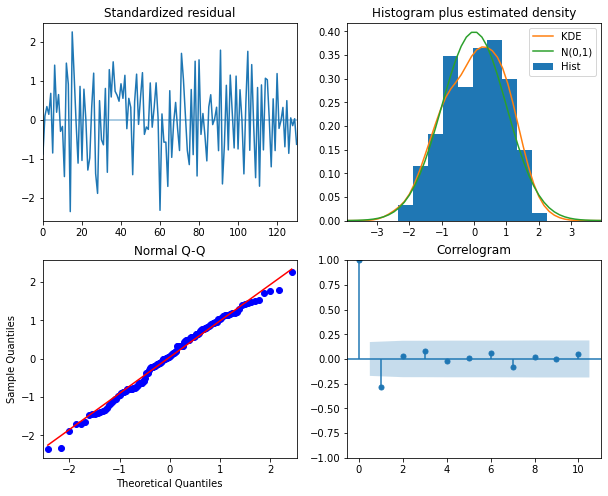

In [6]:
smodel_MSP.plot_diagnostics(figsize=(10,8))
plt.show()
# @ ALL: Outliers on the left is to be expected cause we only did first order diff on data in model!
# So nothing so worry about...

### Miami

In [7]:
smodel_MIA = pm.auto_arima(train.MIA, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=1, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel_MIA.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=2678.568, Time=0.58 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2672.600, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2676.341, Time=0.11 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=2676.708, Time=0.15 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=2676.136, Time=0.06 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=2681.646, Time=0.08 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.31 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=2675.275, Time=0.03 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=2675.814, Time=0.04 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=2677.617, Time=0.15 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : AIC=2673.072, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,1,0)[12]          
Total fit time: 1.564 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood               -1335.300
Date:                            Sat, 06 Nov 2021   AIC                           2672.600
Time:                                    10:14:49   BIC                           2675.475
Sample:                                         0   HQIC                          2673.768
                                            - 144                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       4.15e+07    5.2e+06      7.973      0.000    3.13e+07    5.17e+07
===================================================================================
Ljung-Box (L1) (Q):                  13.90   Jarque-Bera (JB):                 0.38
Prob(Q):                              0.00   Prob(JB):                         0.83
Heteroskedasticity (H):               0.55   Skew:                             0.11
Prob(H) (two-sided):                  0.05   Kurtosis:                         2.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

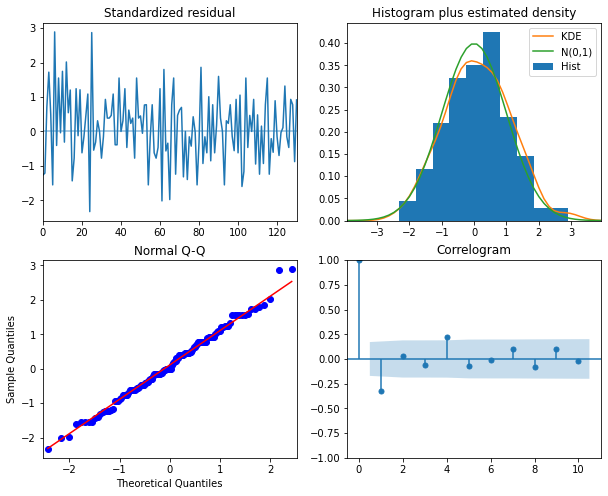

In [8]:
smodel_MIA.plot_diagnostics(figsize=(10,8))
plt.show()

### Las Vegas

In [9]:
smodel_LAS = pm.auto_arima(train.LAS, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel_LAS.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=2636.292, Time=0.43 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2639.866, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2636.758, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=2636.404, Time=0.14 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=2640.955, Time=0.12 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=0.48 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=2634.866, Time=2.49 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=inf, Time=2.89 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=2635.147, Time=0.79 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=2635.038, Time=0.95 sec
 ARIMA(2,1,1)(0,1,2)[12]             : AIC=2634.770, Time=1.58 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=2635.942, Time=0.63 sec
 ARIMA(2,1,1)(1,1,2)[12]             : AIC=inf, Time=1.13 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=inf, Time=0.70 sec
 ARIMA(2,1,0)(0,1,2)[12]             : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  144
Model:             SARIMAX(2, 1, 0)x(0, 1, [1, 2], 12)   Log Likelihood               -1312.093
Date:                                 Sat, 06 Nov 2021   AIC                           2634.187
Time:                                         10:15:07   BIC                           2648.563
Sample:                                              0   HQIC                          2640.028
                                                 - 144                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0283      0.038     -0.735      0.463      -0.104       0.047
ar.L2          0.0378      0.058      0.648      0.517      -0.076       0.152
ma.S.L12      -0.0993      0.025     -3.963      0.000      -0.148      -0.050
ma.S.L24      -0.0416      0.017     -2.516      0.012      -0.074      -0.009
sigma2      3.104e+07      2e-10   1.55e+17      0.000     3.1e+07     3.1e+07
===================================================================================
Ljung-Box (L1) (Q):                   4.37   Jarque-Bera (JB):                 2.75
Prob(Q):                              0.04   Prob(JB):                         0.25
Heteroskedasticity (H):               1.22   Skew:                            -0.06
Prob(H) (two-sided):                  0.50   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.81e+32. Standard errors may be unstable.
"""

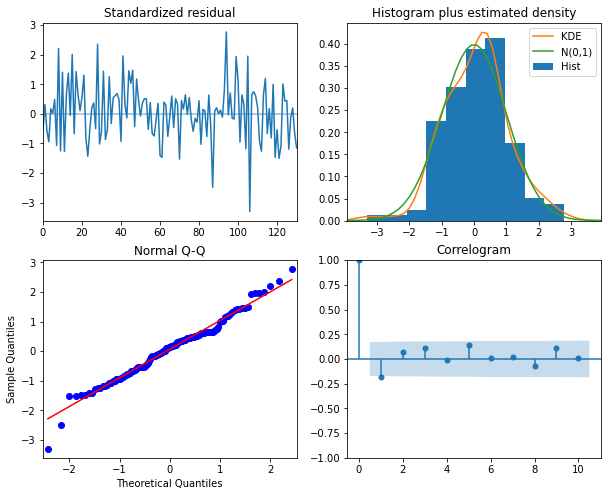

In [10]:
smodel_LAS.plot_diagnostics(figsize=(10,8))
plt.show()

## 3.2 Forecasting

In [21]:
def forecasting(Column_Train, Column_Test, SARIMA, City):
    # Forecast
    n_periods = 20 # 79/4Wch = Month to Forecast
    fitted, confint = SARIMA.predict(n_periods = n_periods, return_conf_int = True)
    index_of_fc = pd.date_range(train.index[-1], periods = n_periods, freq = 'MS')

    # make series for plotting purpose
    fitted_series = pd.Series(fitted, index = index_of_fc)
    lower_series = pd.Series(confint[:, 0], index = index_of_fc)
    upper_series = pd.Series(confint[:, 1], index = index_of_fc)
    
    # Plot
    plt.style.use("ggplot")
    plt.figure(figsize = (18, 5))
    plt.plot(Column_Train, label = "Training-Data")
    plt.plot(Column_Test, label = "Testing-Data")
    plt.plot(fitted_series, color = 'darkgreen', label = "Forecast with 95% Confidence Interval ")
    plt.fill_between(lower_series.index, 
                     lower_series, 
                     upper_series, 
                     color = 'k', alpha = .15)
    plt.axvline(x = 18280, color = 'black')
    plt.ylabel("House Price")
    plt.xlabel("Years")
    plt.text(x = 17450, y = 330000, s = "First COVID-19 Case in the US")

    plt.title(f"SARIMA Forecasting for {City}")
    plt.legend(loc = 2)
    plt.show()

### Minneapolis

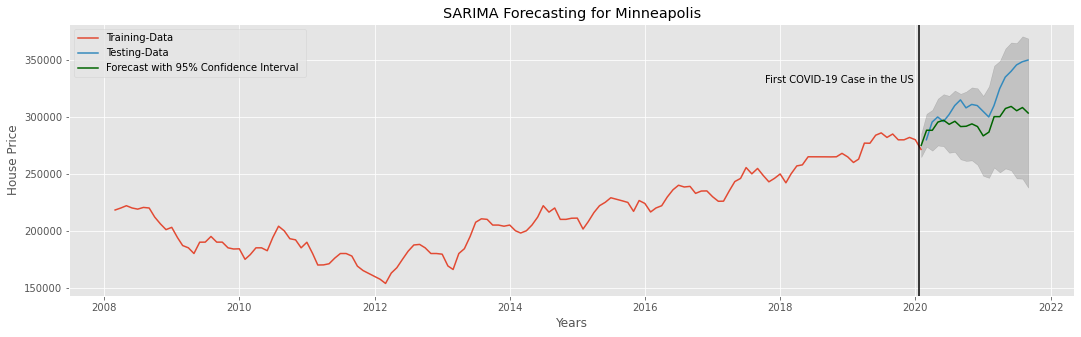

In [22]:
forecasting(train.MSP, test.MSP, smodel_MSP, "Minneapolis")

### Miami

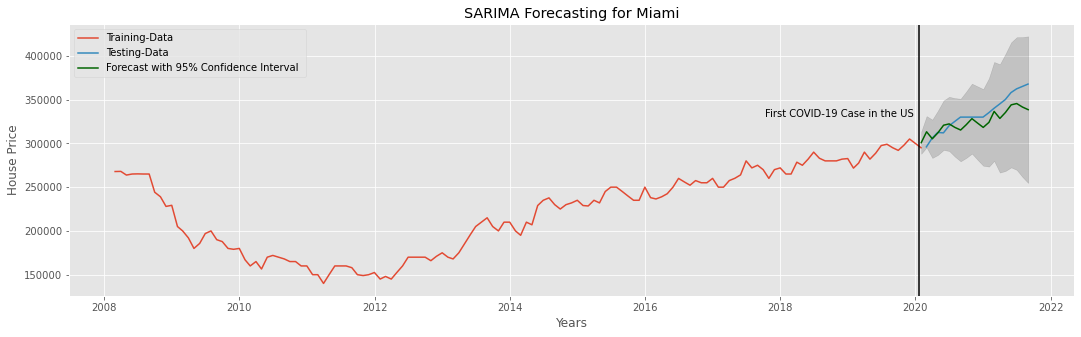

In [23]:
forecasting(train.MIA, test.MIA, smodel_MIA, "Miami")

### Las Vegas

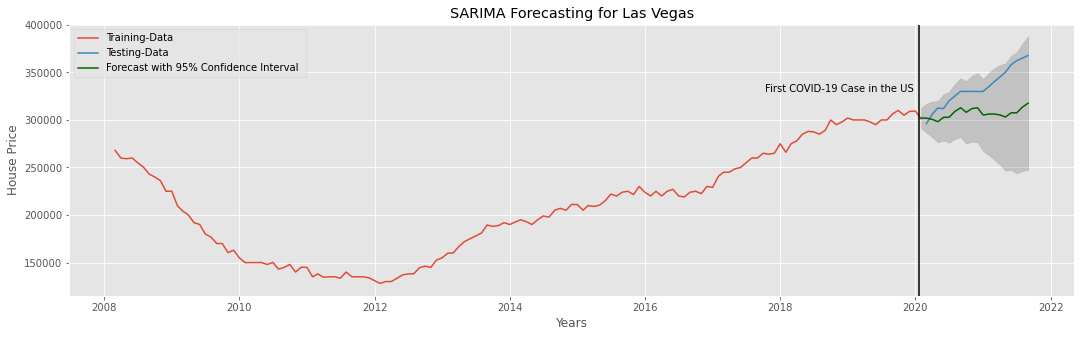

In [24]:
forecasting(train.LAS, test.MIA, smodel_LAS, "Las Vegas")

# 4. Lineare Regression

In [25]:
def preprocessing_ols(Test, SARIMA, Covid):
    new_test = Test[1:]
    
    # Forecast
    n_periods = 20 # 79/4Wch = Month to Forecast
    fitted, confint = SARIMA.predict(n_periods = n_periods, return_conf_int = True)
    index_of_fc = pd.date_range(train.index[-1], periods = n_periods, freq = 'MS')
    fitted_series = pd.Series(fitted, index = index_of_fc)
    new_fitted_series = fitted_series[1:]
    
    residuals = [new_test[i]-new_fitted_series[i] for i in range(len(new_test))]
    
    new_cov = Covid[:18]
    new_cov = new_cov["cases"]
    
    d = {"Residuals": residuals, "Covid": new_cov}
    df = pd.DataFrame(d)
    
    x = df["Covid"]
    y = df["Residuals"]
     
    mod = sm.OLS(x, y)
    res = mod.fit()
    print(res.summary())

### Minneapolis

In [16]:
preprocessing_ols(test.MSP, smodel_MSP, cov_MSP)

                                 OLS Regression Results                                
Dep. Variable:                  Covid   R-squared (uncentered):                   0.350
Model:                            OLS   Adj. R-squared (uncentered):              0.312
Method:                 Least Squares   F-statistic:                              9.159
Date:                Sat, 06 Nov 2021   Prob (F-statistic):                     0.00761
Time:                        10:15:09   Log-Likelihood:                         -194.42
No. Observations:                  18   AIC:                                      390.8
Df Residuals:                      17   BIC:                                      391.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### Miami

In [17]:
preprocessing_ols(test.MIA, smodel_MIA, cov_MIA)

                                 OLS Regression Results                                
Dep. Variable:                  Covid   R-squared (uncentered):                   0.510
Model:                            OLS   Adj. R-squared (uncentered):              0.482
Method:                 Least Squares   F-statistic:                              17.72
Date:                Sat, 06 Nov 2021   Prob (F-statistic):                    0.000590
Time:                        10:15:09   Log-Likelihood:                         -211.17
No. Observations:                  18   AIC:                                      424.3
Df Residuals:                      17   BIC:                                      425.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### Las Vegas

In [18]:
preprocessing_ols(test.LAS, smodel_LAS, cov_LAS)

                                 OLS Regression Results                                
Dep. Variable:                  Covid   R-squared (uncentered):                   0.333
Model:                            OLS   Adj. R-squared (uncentered):              0.294
Method:                 Least Squares   F-statistic:                              8.484
Date:                Sat, 06 Nov 2021   Prob (F-statistic):                     0.00970
Time:                        10:15:09   Log-Likelihood:                         -201.96
No. Observations:                  18   AIC:                                      405.9
Df Residuals:                      17   BIC:                                      406.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
